# Threshold: A Model for Automated EEG Artifact Removal

## Aims
Manual annotation of artifacts in EEG data is a tedious, time-consuming task. However, the impact of artifacts on analyses such as Welch's Power Spectral Density (PSD) estimate is not yet known - it could be that artifacts do not have to be removed at all. Or, if artifacts do pollute the PSD estimate, it would be much more efficient to remove the artifacts using an automated model. Given the capabilities of today's technology, it makes sense to consider how it can be taken advantage of to detect and remove artifacts effectively, accurately, and objectively. This project aims to address: 
1. whether a local threshold model can be created to detect and remove artifacts
2. both the effect of artifact removal and the model performance by comparing PSDs outputted by the model with the "ground truth" PSD created when artifacts are removed using manual annotations
3. the differences when the model is applied to both the STXBP1 and Ube3a genotypes

The potential of this project lies in its ability to significantly reduce or even eliminate the need to manually mark and remove artifacts, leading to possibly hundreds of hours worth of time saved. 

---

## Data
This project made use of continuous 24-hour recordings from 20 animals (each with its own EDF, annotation, and spindle files), 10 from each genotype. 

---

## Methods
As established, an overarching goal of this project is to estimate PSDs at various levels of thresholding, and to determine whether any of them are comparable to manual artifact removal. This section will outline the methods taken to create the local threshold model, as well as the decisions that influenced and dictated the process. 

This project is centered around the creation and combination of various boolean masks the size of the EEG signal whose True/False values indicate the presence, or lack thereof, of an artifact. These masks have the powerful ability to merge several conditions into one, which will ultimately determine the locations of artifacts. These conditions include the sleep state of the animal, as well as whether a signal surpassed the upper or lower thresholds determined by the model. The use of masks also allows for greater reusability, such that if more conditions were to be introduced, they could be readily implemented into the model. 

#### Preprocessing
Prior to thresholding, each EDF file is first notch filtered to remove 60 Hz noise, and then downsampled 20x from 5000 Hz to 250 Hz. 

#### Sleep and awake states
Given that the animals are likely to have produced more artifacts while awake, it felt adequate to divide the data into sleep and awake states.

#### Thresholding
Importantly, the threshold masks are built using the local threshold model that assumes normality of the voltage values. Because a 24-hour recording (with 250 samples per second) is a vast amount of data, it is bound to have fluctuations that would not be captured had a single global mean be computed. To address this, the data was split into equally-sized chunks, each with its own mean and standard deviation, and accordingly, its own thresholds. These chunk sizes were set to 15,000 samples (one minute), a number of samples at which the data was presumed to remain constant. This approach allows us to capture variability within each chunk, making the thresholds more reflective of the properties of each specific chunk. Thus, for each one minute of data, samples exceeding a given number of standard deviations above the mean of the its chunk would be marked as an artifact. 

Another fundamental decision made was that if an artifact was detected in one channel, then the model considers there to be an artifact in that location for all channels. This allows the threshold mask to be one-dimensional. 

For each sleep state, we have designated 5 threshold levels: 
1. 3, 4, 5, and 6 standard deviations above or below the chunk mean
2. No thresholding (original data without artifact removal)

Altogether, a PSD estimation will be computed for each of 12 different conditions: 
1. awake (no thresholding)
2. sleep 
3. awake + artifacts manually annotated
4. sleep + annotated
5. awake + threshold = 3 standard deviations
6. awake + threshold = 4
7. awake + threshold = 5
8. awake + threshold = 6
9. sleep + threshold = 3
10. sleep + threshold = 4
11. sleep + threshold = 5
12. sleep + threshold = 6

#### PSDs
Once the masks are applied to each animal's EEG data, Welch's Power Spectral Density (PSD) estimate is computed for each of the 10 conditions listed above. These PSDs are then plotted for each animal. From the plots, we hope to find that the PSD produced by one of the standard deviation thresholds, or the no thresholding level, is an acceptable approximation of the PSD when the artifacts are annotated by hand. 

---

## Results
#### PSD Estimations
From our plots, we found that PSD estimations from unannotated data with large amounts of artifacts is improved by thresholding, and is comparable to the PSD of manually-annotated data. 

Each of the PSD figures is separated horizontally, with the awake state PSDs above, and the asleep state PSDs below. Each state then consists of three subplots that represent the three main EEG channels. Six PSDs are computed for each subplot, four for each standard deviation threshold level, and one each for the annotated and unannotated data. 

One prominent observation that can be made from the plots is that thresholding is especially beneficial to Ube3a data - the unthresholded PSDs in the awake state are often jagged and chaotic, whereas the model-thresholded PSDs are smoother, and have general shapaes commensurate with that of the manually-annotated PSDs. Two obvious instances of the benefit of thresholding to Ube3a animals are in the PSD estimations of animals DL00A1 (Fig. 1) and DL00C1 (Fig. 2). As can be seen, the jaggedness of the awake-state PSDs when artifacts are not removed is immediately cut down starting with the lowest standard deviation level of thresholding. 

*Figure 1: Ube3a animal DL00A1* 

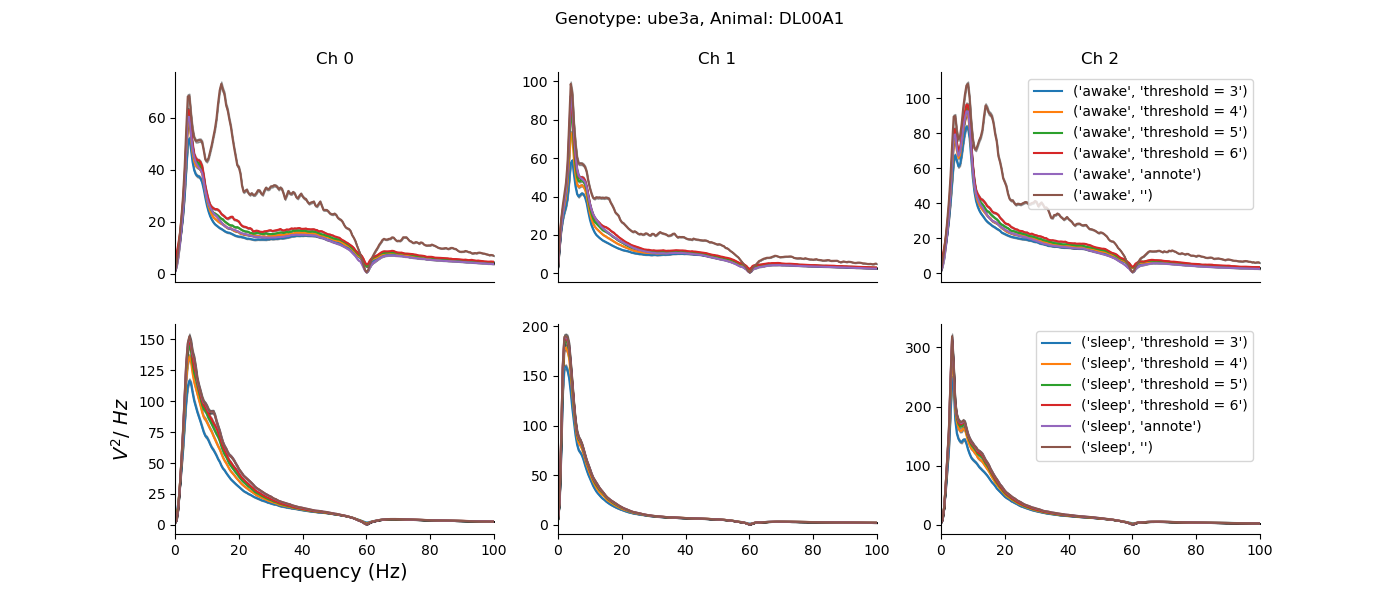 

<div style="break-after:page"></div>

*Figure 2: Ube3a animal DL00C1* 

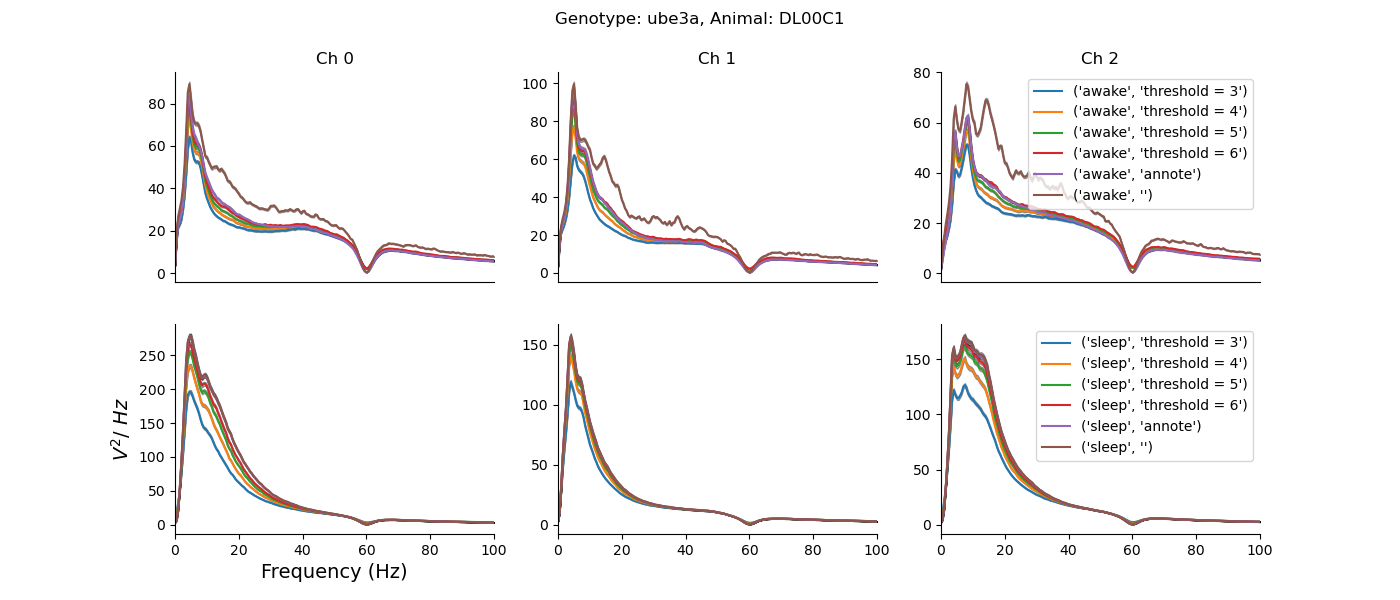 

This effect, to a lower extent, can also be seen in the STXBP1 plots. For the most part, however, STXBP1 PSDs seem to be minimally affected by the removal of artifacts - as in, the unthresholded PSDs are nearly identical to that of the "ground truth" annotated PSDS, and hence whether they are kept or removed from the data has little consequence. Below are two STXBP1 PSD plots (Fig 3, Fig. 4) that exemplify these findings. 

*Figure 3: STXBP1 animal CW0DA2* 

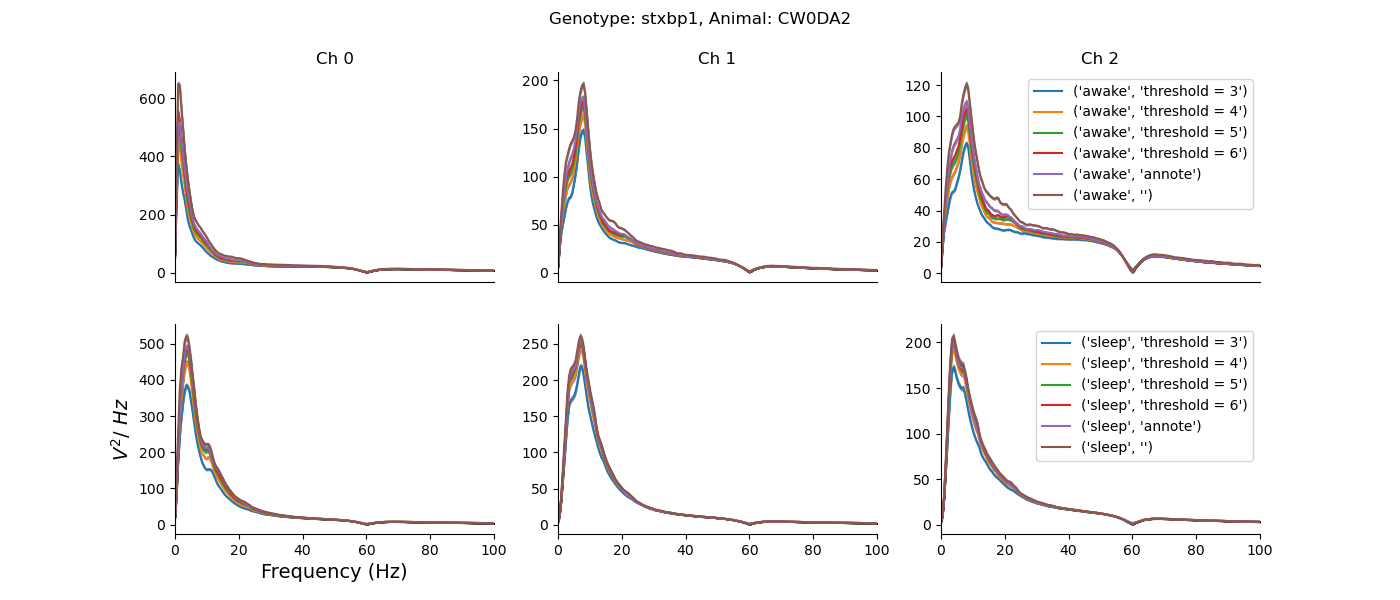

<div style="break-after:page"></div>

*Figure 4: STXBP1 animal CW0DN2* 

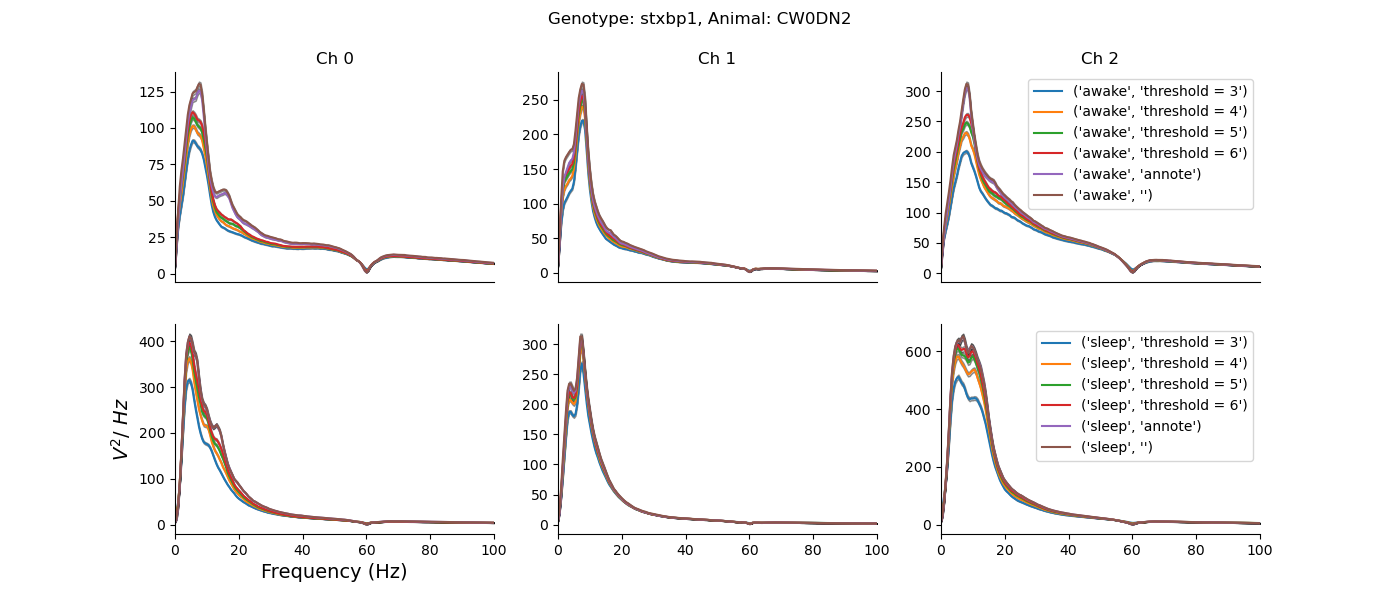

It can also noted that, for the most part, thresholding has little impact on PSDs of both genotypes while the animal is asleep. However, there are some cases in the Ube3a genotype in which thresholding appears to be helpful - this is the case most prominently for animals DL00A4 (Fig. 5) and DL00B1 (fig. 6), shown below.

*Figure 5: Ube3a animal DL00A4* 

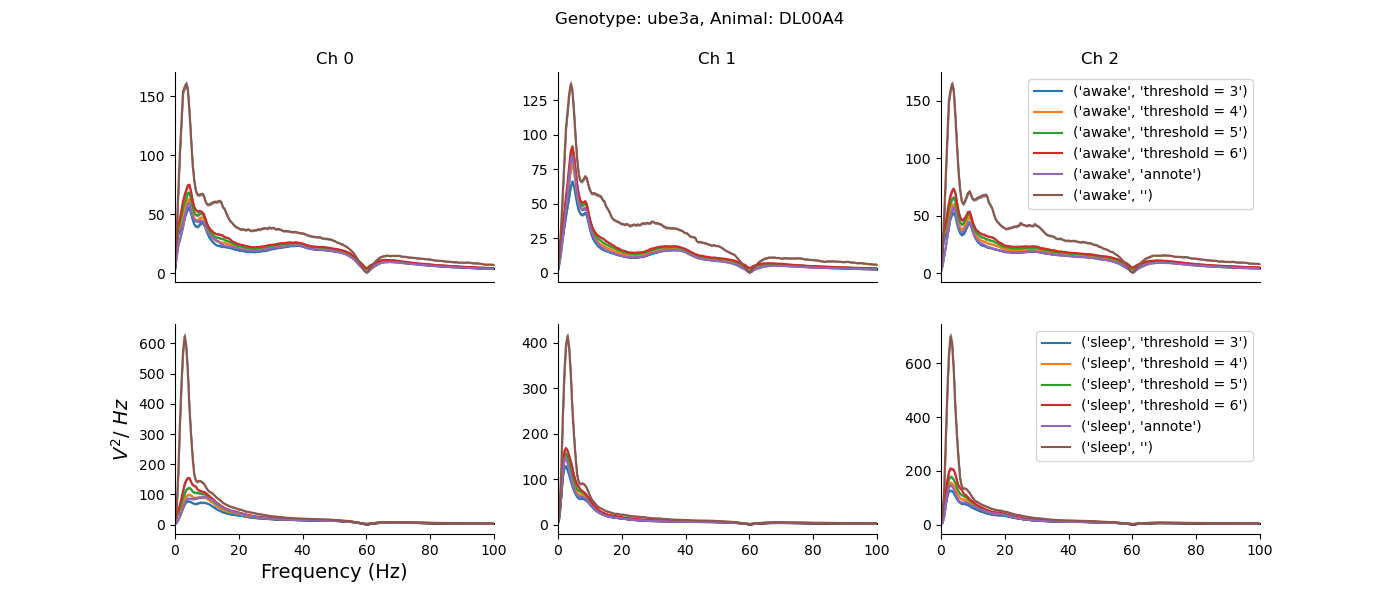

<div style="break-after:page"></div>

*Figure 6: Ube3a animal DL00B1* 

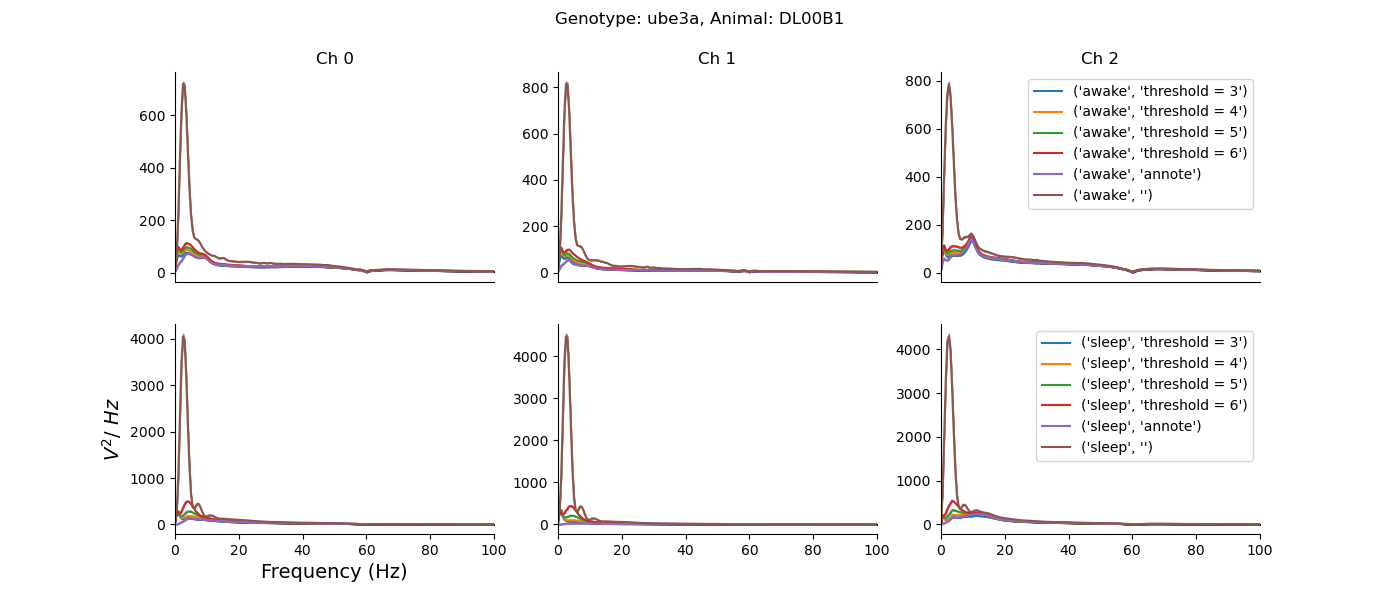

One question that was raised regarding these results was how the varying approaches of labelling artifacts between the model and a human scientist would reflect in the PSDs. A human is more likely to merge neighboring artifacts into a singular artifact, given that these artifacts are close enough to each other. The model, however, does not merge artifacts, and as a result, less data would be removed from its PSD estimates compared to the annotated PSD. It follows that the model PSD estimates might further approach the annotated PSD if the model is able to simulate the way by which humans mark artifacts. This was done by merging all artifacts within 125 samples of each other into one. Once PSD plots were obtained for this new approach, it was seen that combining neighboring artifacts made little difference to the PSD and so was not necessary. 

Below are the PSD plots (Fig. 7, Fig. 8, Fig. 9, Fig. 10) corresponding to the aforementioned several animals, with use of the altered model that combines artifacts. It can be observed that when artifacts within half a second of each other are merged, the PSDs are nearly indistinguishable from the PSDs of when artifacts were not merged. All later analyses will be conducted using the original PSD estimations. 

<div style="break-after:page"></div>

*Figure 7: Ube3a animal DL00A1* 

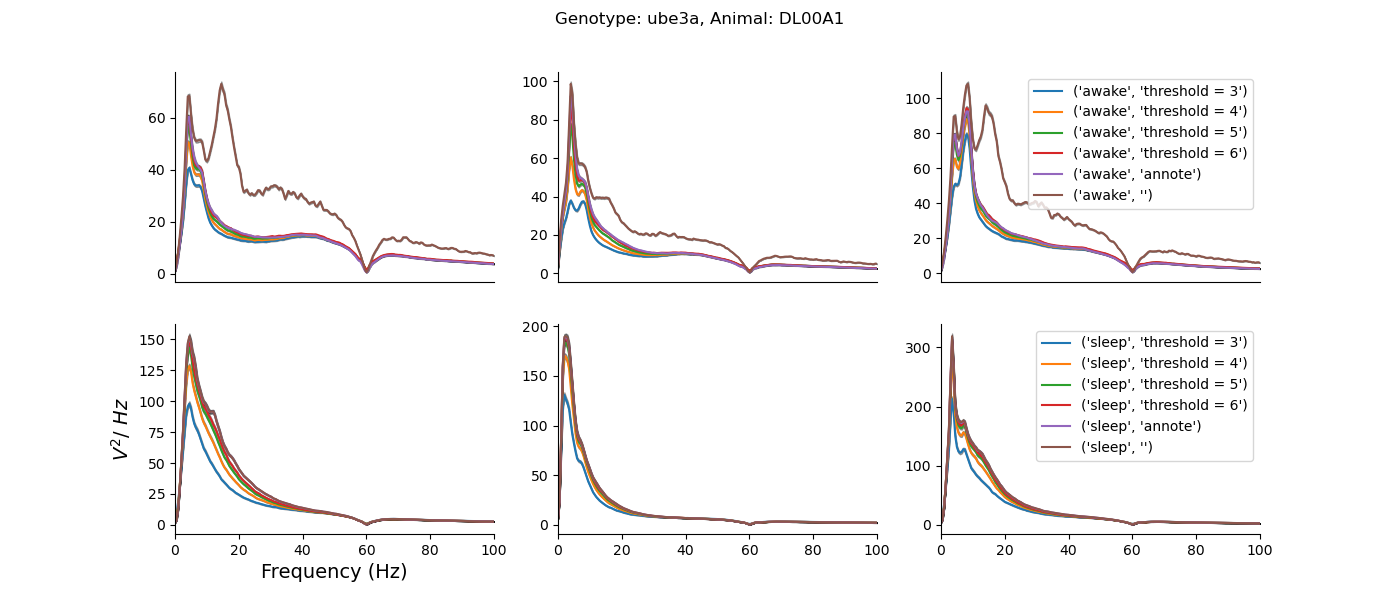

*Figure 8: Ube3a animal DL00C1* 

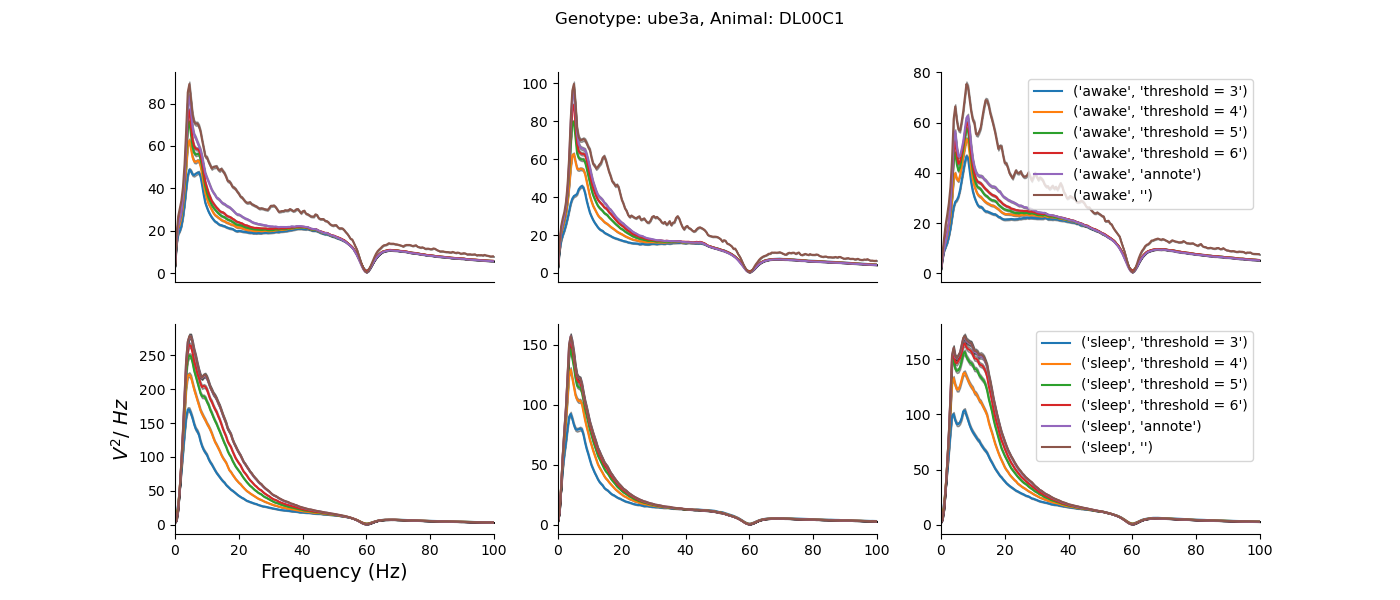

<div style="break-after:page"></div>

*Figure 9: STXBP1 animal CW0DA2* 

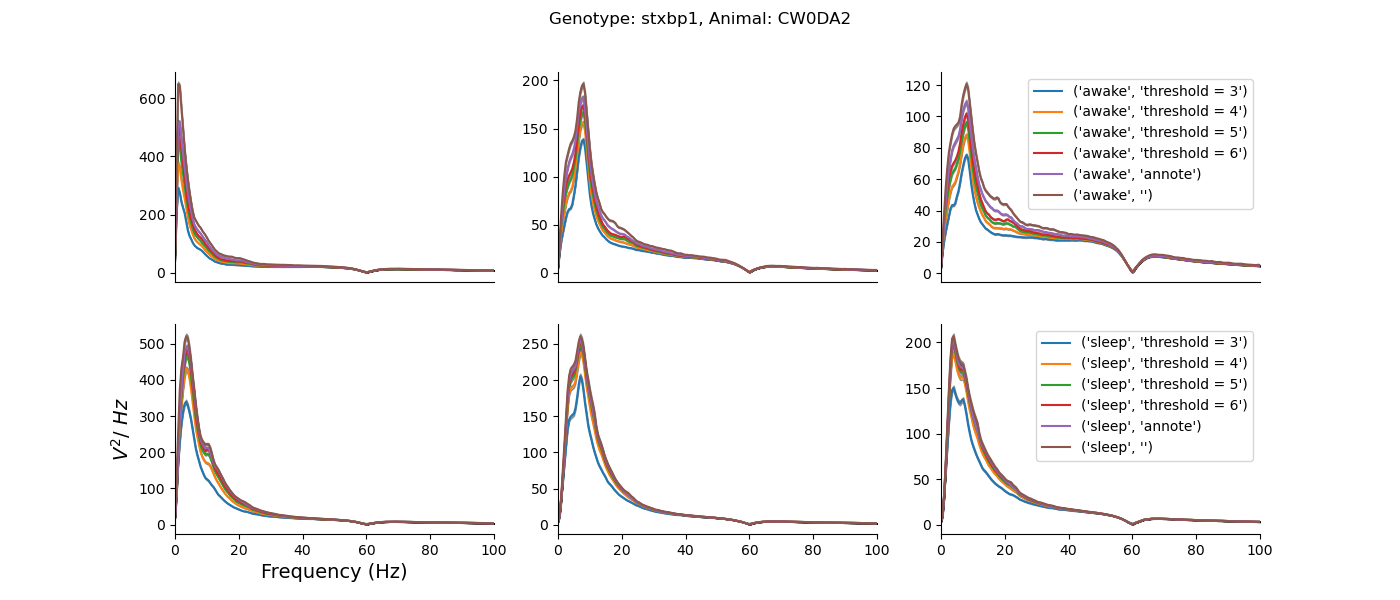

*Figure 10: STXBP1 animal CW0DN2* 

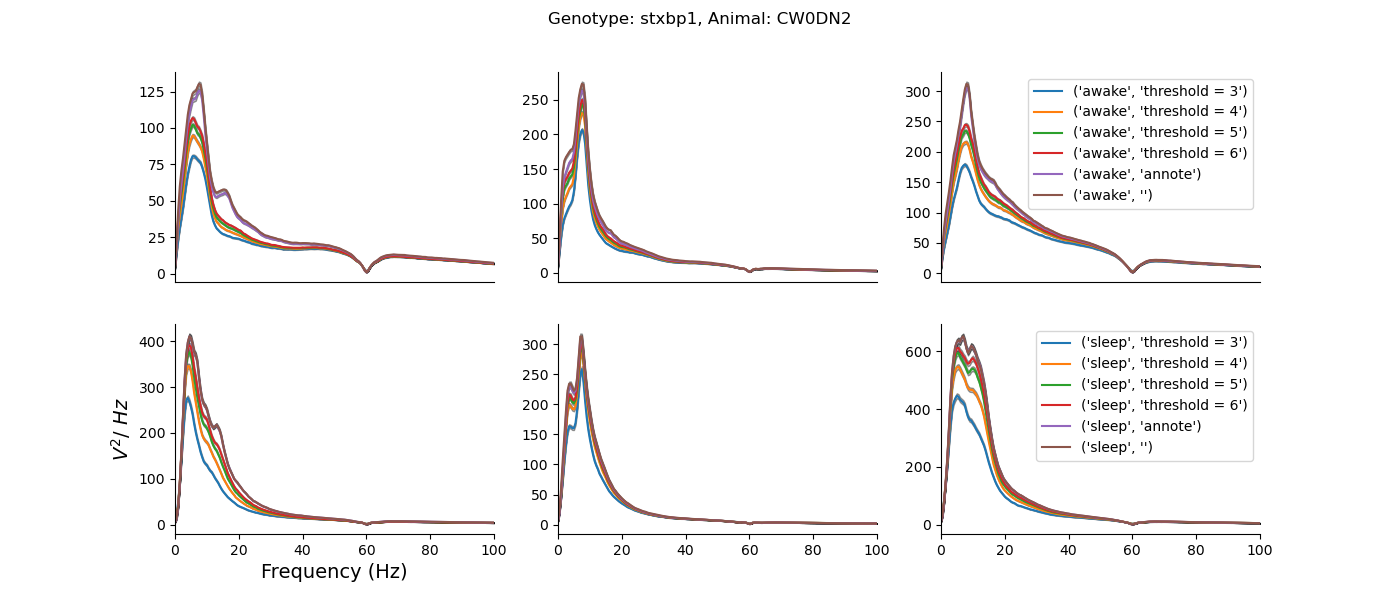

#### Artifact Statistics
It is, however, important to understand reasons for potential differences in findings between the STXBP1 anad Ube3a genotypes. The PSD plots demonstrate that there are clear differences in the impact of thresholding between the two genotypes. This, perhaps, can be explained by the differences in artifact rarity between the two genotypes.

We highlighted artifact counts and durations as key factors that may cause our findings to differ, because it makes sense that the removal of artifacts from data with more artifact counts and/or longer durations might induce a more noticeable difference in its PSD estimation. 

From the below boxplots, it is evident that Ube3a animals (n = 10) have substantially more artifacts than STXBP1 animals (n = 10), which is consistent with the differences seen in the PSD plots. Interestingly, some Ube3a animals appear to produce a considerable amount of artifacts while sleeping; this explains the observation that thresholding was helpful for some Ube3a animals. Ube3a animals also have, on average, longer artifact durations, though the difference between the two genotypes is not as dramatic as that of the artifact counts. 

*Figure 11: artifact counts and durations for STXBP1 and Ube3a genotypes in each sleep state* 

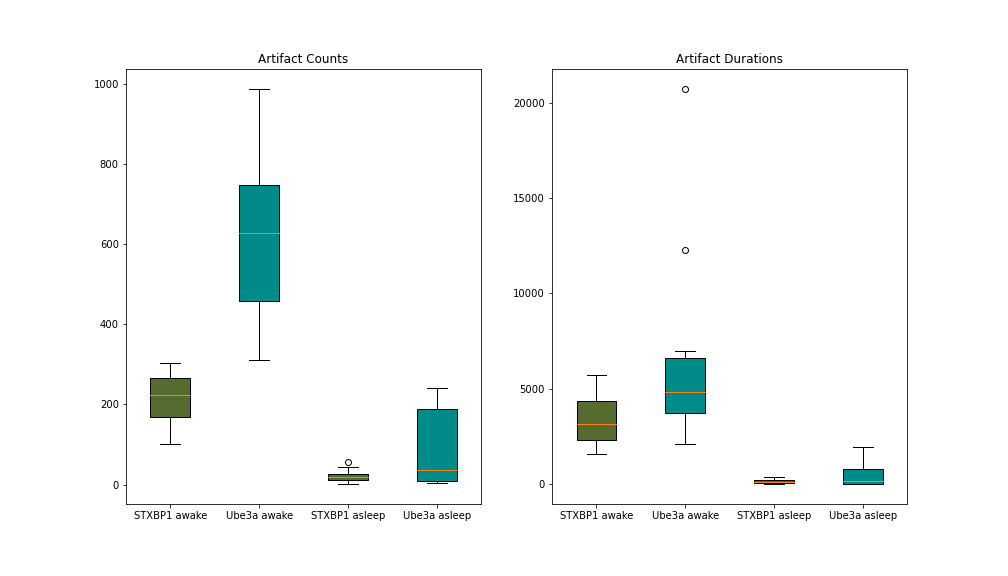

Further computations find that on average, artifacts produced by STXBP1 and Ube3a mice while awake represent approximately 3.93% and 7.95% of the 24-hour recording duration, respectively. 

With this insight, it is reasonable to expect that removing artifacts from Ube3a data might have a more noticeable impact on the PSD estimate than it would for STXBP1 data, though overall, artifacts represent very small portions of the data regardless of genotype. 

#### Quantifying PSD Similarities
From the PSD plots alone, it is difficult to tell which level of thresholding produces the best estimation of the annotated PSD. Given this, it is helpful to be able to quantify objectively (as opposed to inspection by eye) the similarities between each of the thresholded PSDs and the annotated PSD.

To compute each PSD's similarity to its annotated counterpart, we have selected key features that characteraize the shape of a PSD, which are as follows: 

1. the number of major peaks
2. the prominence (a score of the significance of a peak) of the most significant peak
3. the width of the most significant peak
4. the location of the most significant peak

It should be noted that these features were somewhat arbitrary, and are widely based on the general shape of the PSDs, with less emphasis on their amplitudes. PSD amplitudes depend largely on the way in which the electrodes are implanted on the animal, which is subject to variation, especially given that out data was collected by several different people. 

A similarity score ranging from 0.0 to 1.0 has been computed for each animal in its awake state, and for each of the three channels; these three scores per animal are averaged to produce an overall similarity score. A score of 1.0 implies that the given PSD overlaps perfectly with the annotated PSD, and hence the closer the score is to 1.0, the better the given PSD is at approximating the "ground truth."

The below boxplot of the STXBP1 similarities suggests that thresholding actually hinders the extent to which a given PSD estimates the annotated PSD. In fact, the unthresholded PSDs appear to be near-perfect estimations of the annotated PSD. This corroborates the fact that STXBP1 data has few artifacts, and so whether or not they are removed has little consequence on the PSD. It actually seems that removing artifacts by thresholding ends up filtering out too much data, which impacts how well the thresholded PSDs resemble the annotated PSD. However, if a threshold level were to be chosen for the STXBP1 data, it appears that the fifth and sixth standard deviation levels would do a satisfactory job at estimating the annotated PSD. 

*Figure 12: similarities of STXBP1 PSDs at each threshold level to the annotated PSD* 

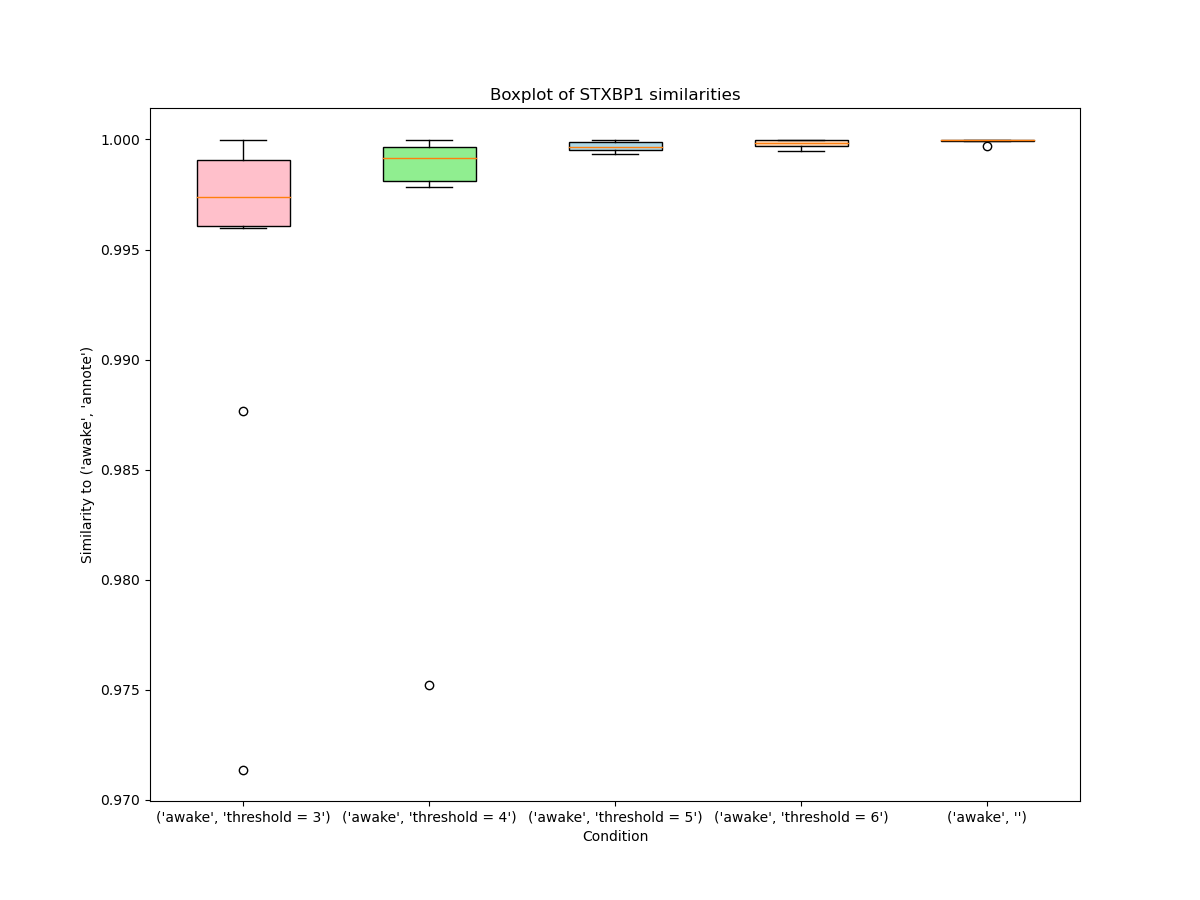

Contrastingly, thresholding is shown to be hugely beneficial to Ube3a data. Of all the threshold levels, the unthresholded PSDs have the largest deviations from the annotated PSD, with some similarity scores dropping below 0.9. On the other hand, it seems that thresholding four standard deviations above the mean produces the most competent at estimating the manually-annotated data. 

*Figure 13: similarities of Ube3a PSDs at each threshold level to the annotated PSD*

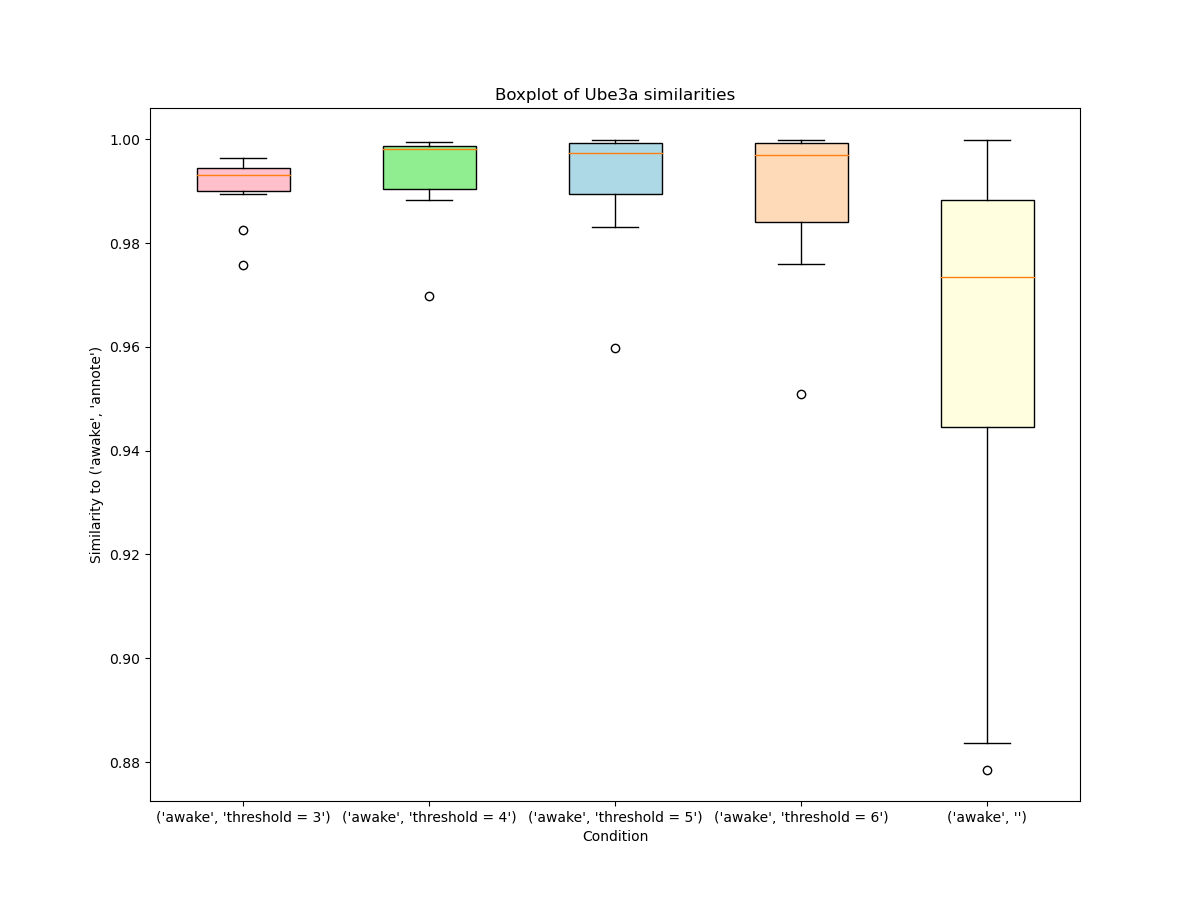

#### Evaluating Model Performance
It is important to assess how effectively our model is performing its given task. In other words, we would like to determine how well our model is actually identifying artifacts, using the manually annotations as the "ground truth." We've chosen to do this using 5 different metrics: 
1. Accuracy: the proportion of correct classifications out of all classifications
    - $ \frac {TP + TN} {TP + TN + FP + FN} $, where $TP$, $TN$, $FP$, and $FN$ represent true positives, true negatives, false positives, and false negatives, respectively
2. Sensitivity (true positive rate): the proportion of actual positives that were correctly classified as positive
    - $ \frac {TP} {TP + FN} $
3. Specificity (true negative rate): the proportion of actual negatives that were correctly classified as negative
    - $ \frac {TN} {TN + FP} $
4. Precision: the proportion of positive classifications that are actually correct
    - $ \frac {TP} {TP + FP} $
5. Proportion within: the proportion of artifacts identified by the model that were also identified by manual annotations

Ideally, each of the above metrics should be as close to 1.0 as possible. However, there are a number of factors that may negatively impact these metrics. For example, accuracy can be misleading when dealing with class-imbalanced datasets. This is the case here, because artifacts are rare, such that as long as the model is correctly labelling most of the non-artifacts, the accuracy is bound to be high. 

One final caveat is that we are essentially assuming that the manual annotations are completely correct, which might not be the case. 

##### STXBP1 metrics: 
*Figure 14: $ Accuracy = \frac {TP + TN} {TP + TN + FP + FN} $* 

The STXBP1 accuracies below suggest that the model's accuracy remains generally constant for each threshold level.

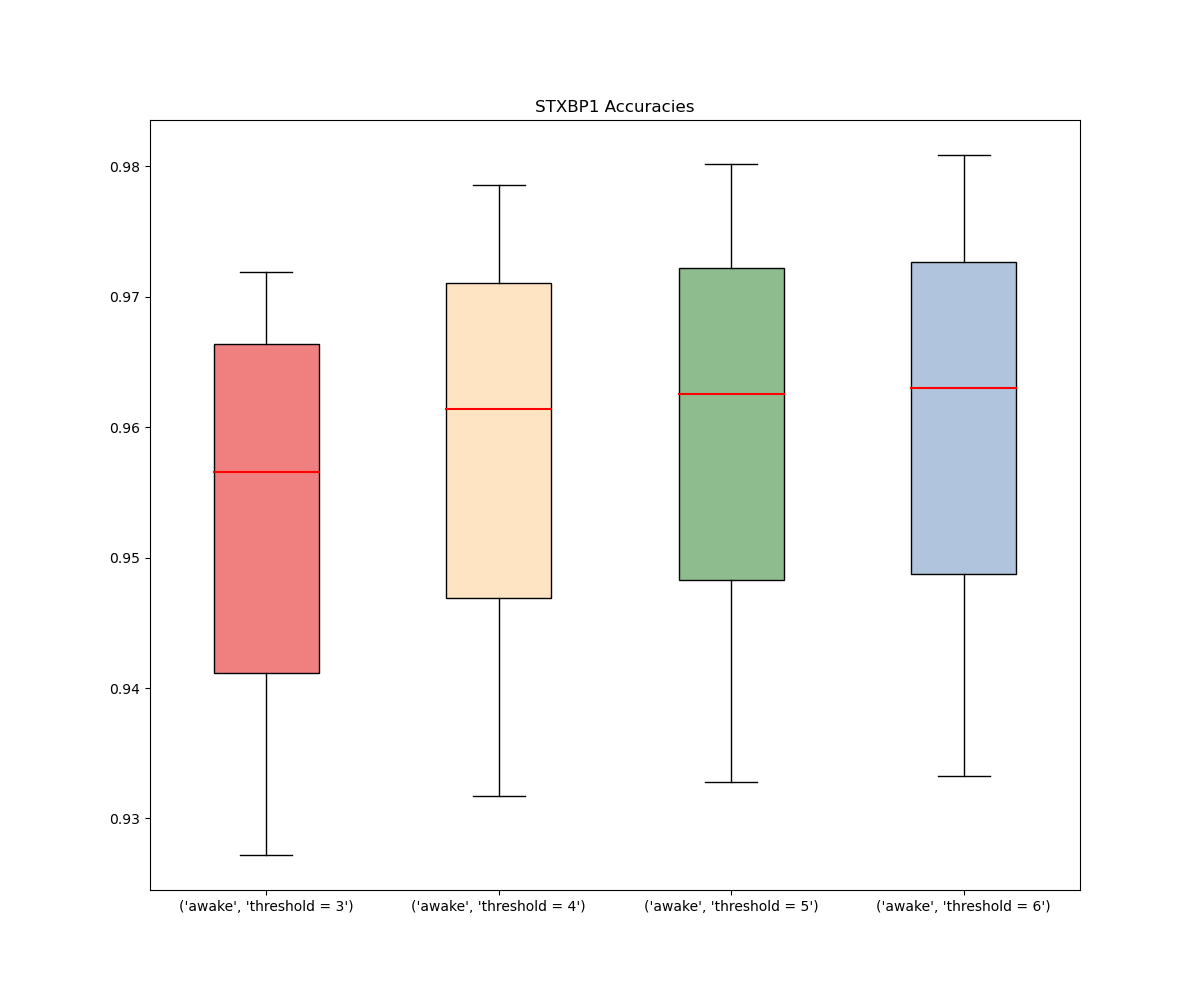

<div style="break-after:page"></div>

*Figure 15: $ Sensitivity = \frac {TP} {TP + FN} $* 

Sensitivity can be thought of as *"how many artifacts were correctly identified out of the ones we wanted to identify as artifacts?"*

The sensitivities are essentially independent of the threshold level - each has around a 0.92 sensitivity, meaning that of all the artifacts marked manually, the model is able to identify 92% of them as artifacts. A constant 8% of artifacts marked manually are classified as non-artifacts by the model. This 8% is contributed to by the fact that the model labels artifacts differently than humans - by picking out small sections of artifacts, instead of merging neighboring ones together. As a result, the model may have a high number of false negatives, meaning it is classifying "artifacts" as non-artifacts. However, the relative scarcity of artifacts prevents this variation from having a substantial impact on the sensitivity. 

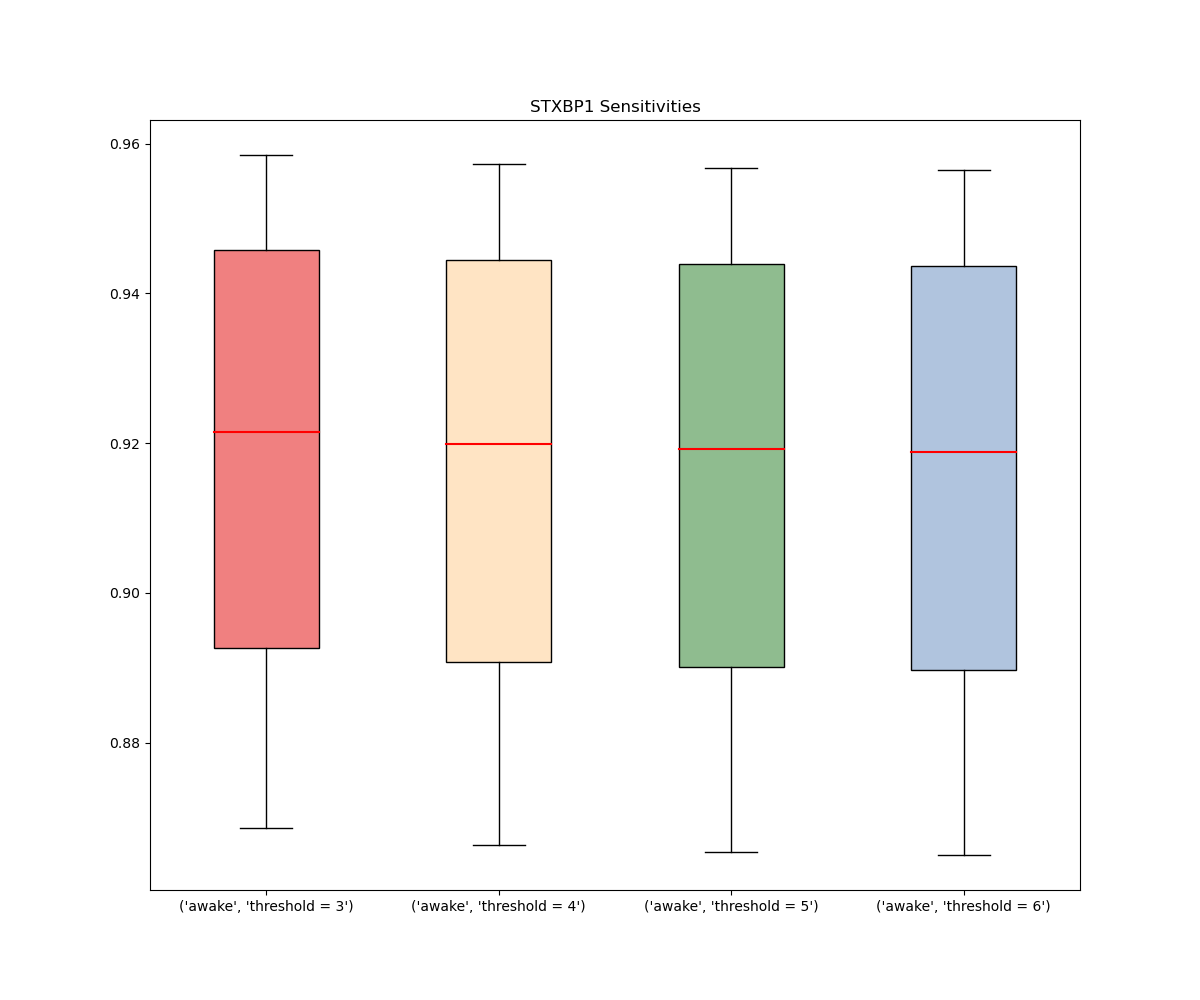

<div style="break-after:page"></div>

Specificity can be thought of as *"how many non-artifacts were ignored out of the ones we wanted to ignore?"*

The specificities increase as threshold level increases. This suggests that at higher threshold levels, there are less false positives (classifying a non-artifact as an artifact). 

*Figure 16: $ Specificity = \frac {TN} {TN + FP} $* 

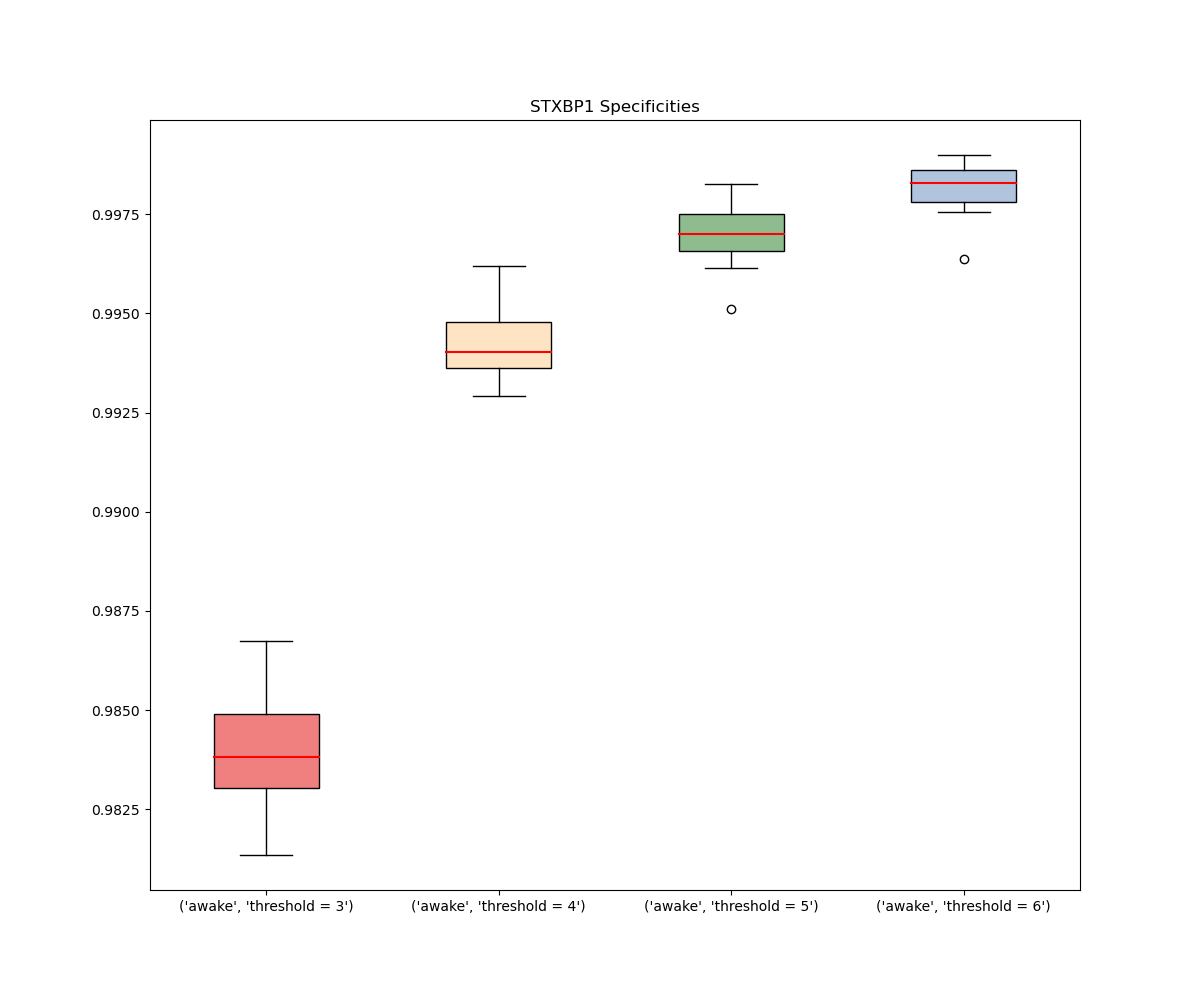

<div style="break-after:page"></div>

Precision can be thought of as *"how many did I correctly classify out of all the ones classified?"*

The precisions show a similar trend to the specificities - the scores increase with the threshold levels. This can once again be explained by the false positives decreasing as the thresholds grow higher. 

*Figure 17: $ Precision = \frac {TP} {TP + FP} $* 

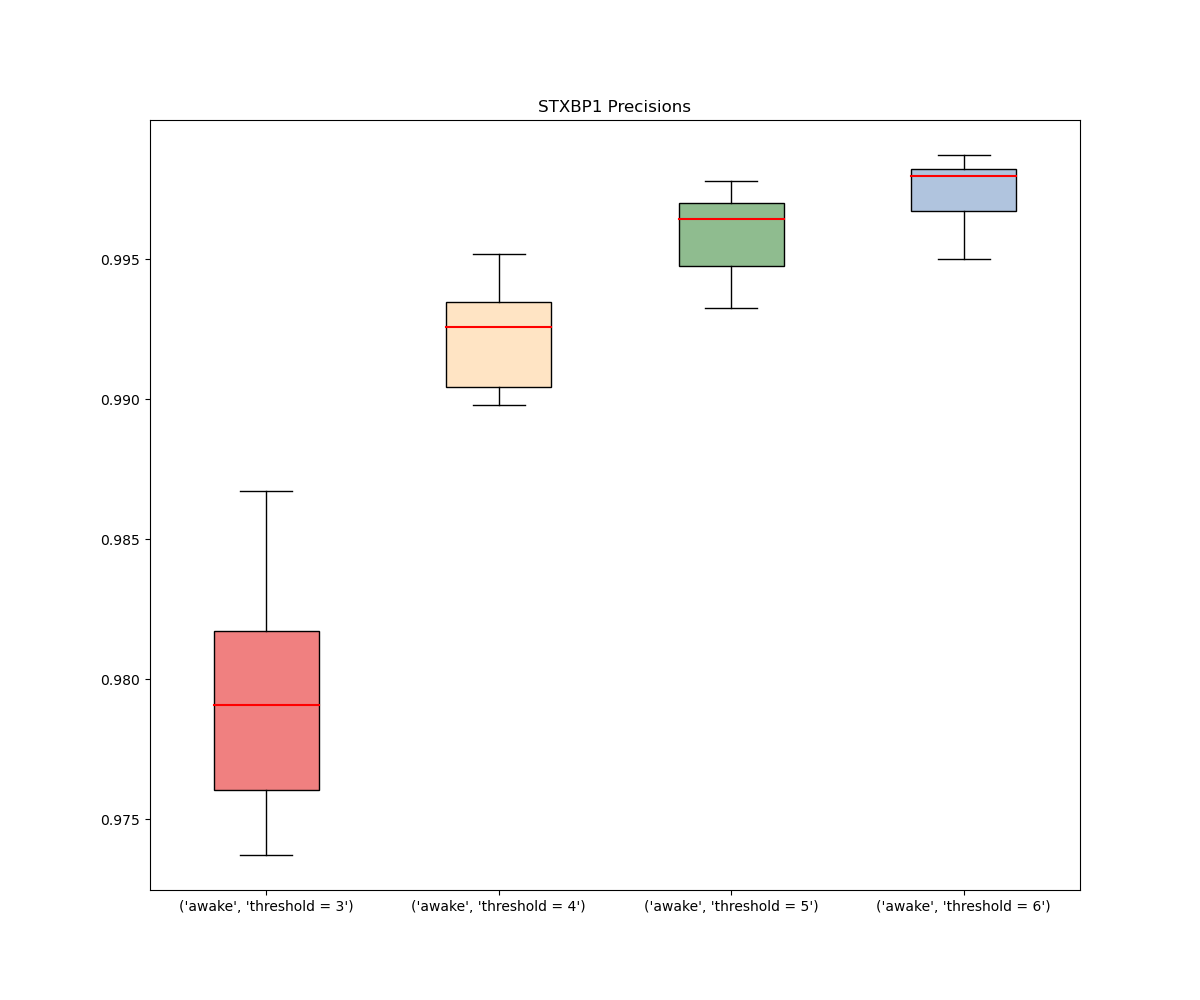

<div style="break-after:page"></div>

The proportions within show that regardless of threshold level, close to 94% of all artifacts identified by the model were also marked as artifacts by annotations. This is a valuable metric, because it is not impacted by the model's tendency to classify "artifacts" as non-artifacts simply due to merging. So, it can be concluded that the model's artifact identification corresponds well to manual artifact identification.

*Figure 18 Proportions within* 

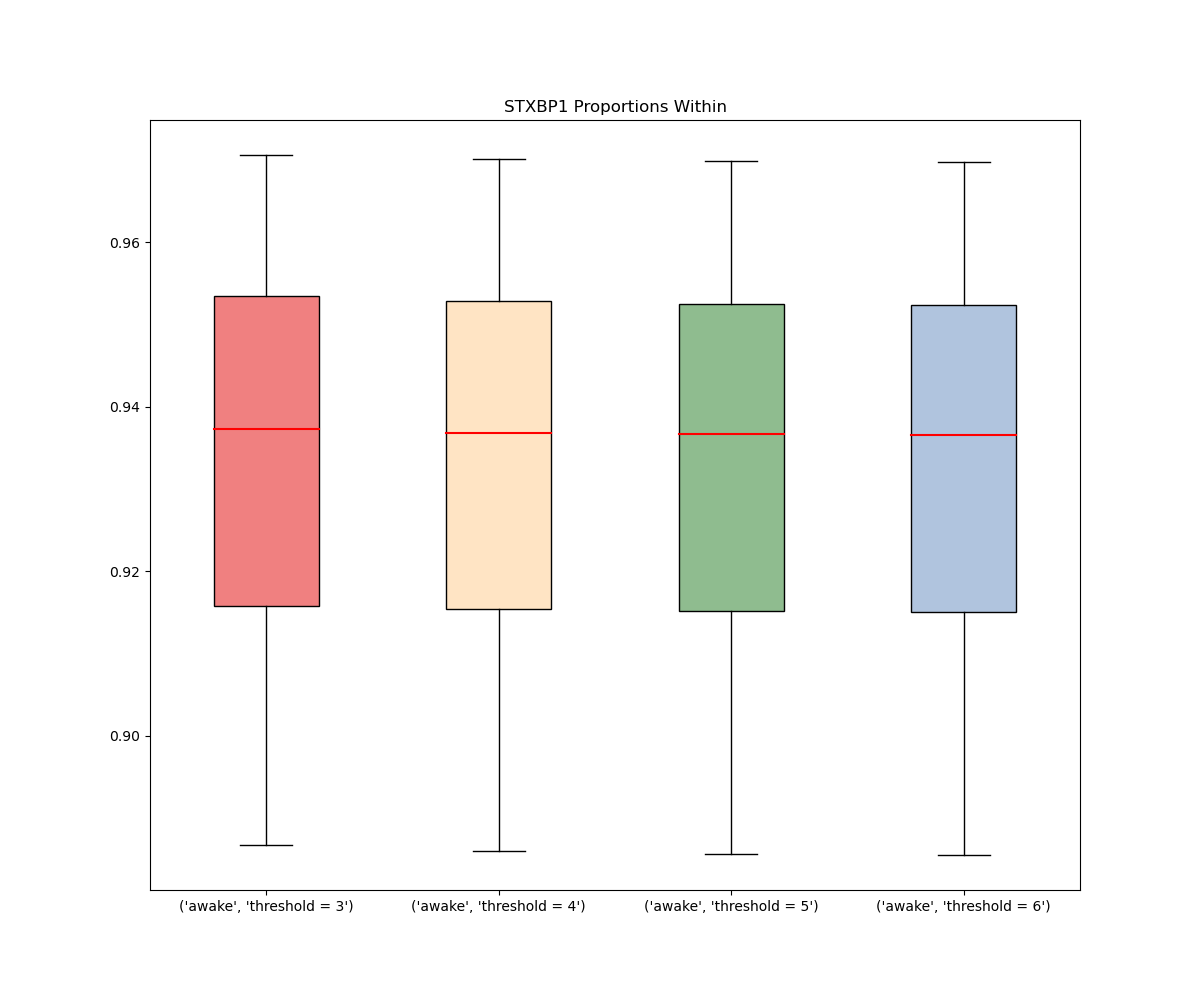

<div style="break-after:page"></div>

##### Ube3a metrics: 

The Ube3a metrics, shown below, display very similar trends to the STXBP1 metrics. 

*Figure 19: $ Accuracy = \frac {TP + TN} {TP + TN + FP + FN} $* 

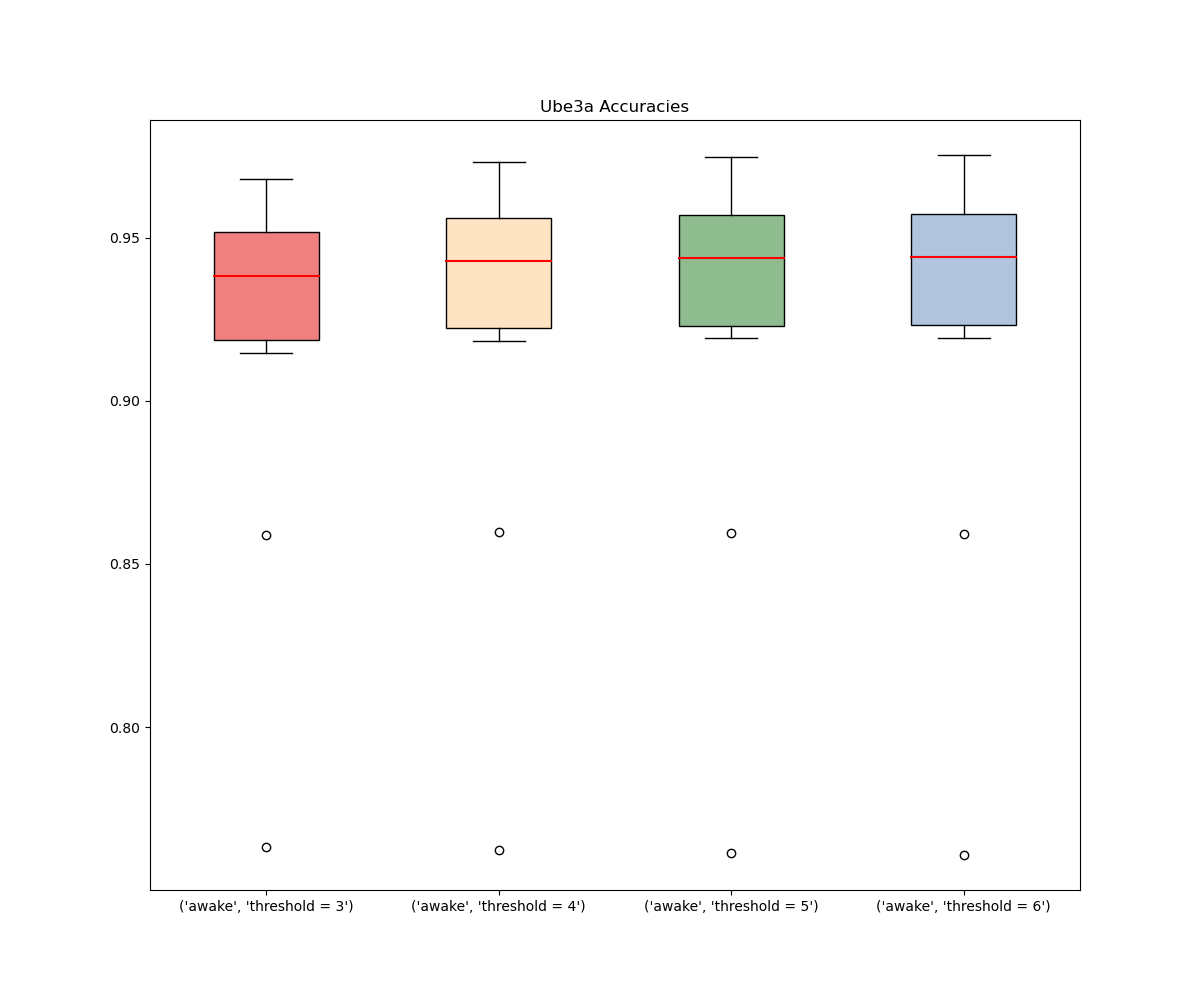

<div style="break-after:page"></div>

*Figure 20: $ Sensitivity = \frac {TP} {TP + FN} $* 

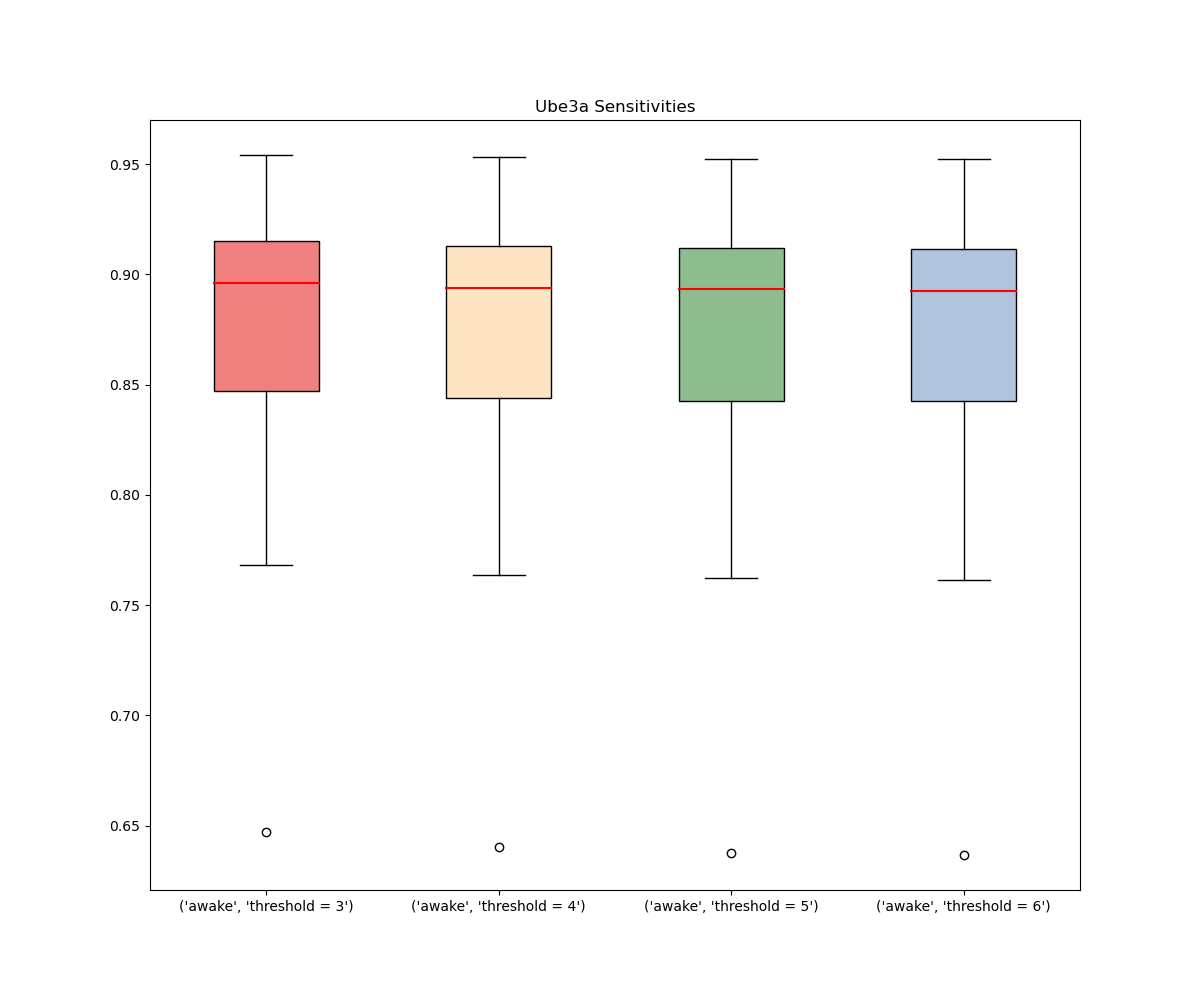

<div style="break-after:page"></div>

*Figure 21: $ Specificity = \frac {TN} {TN + FP} $* 

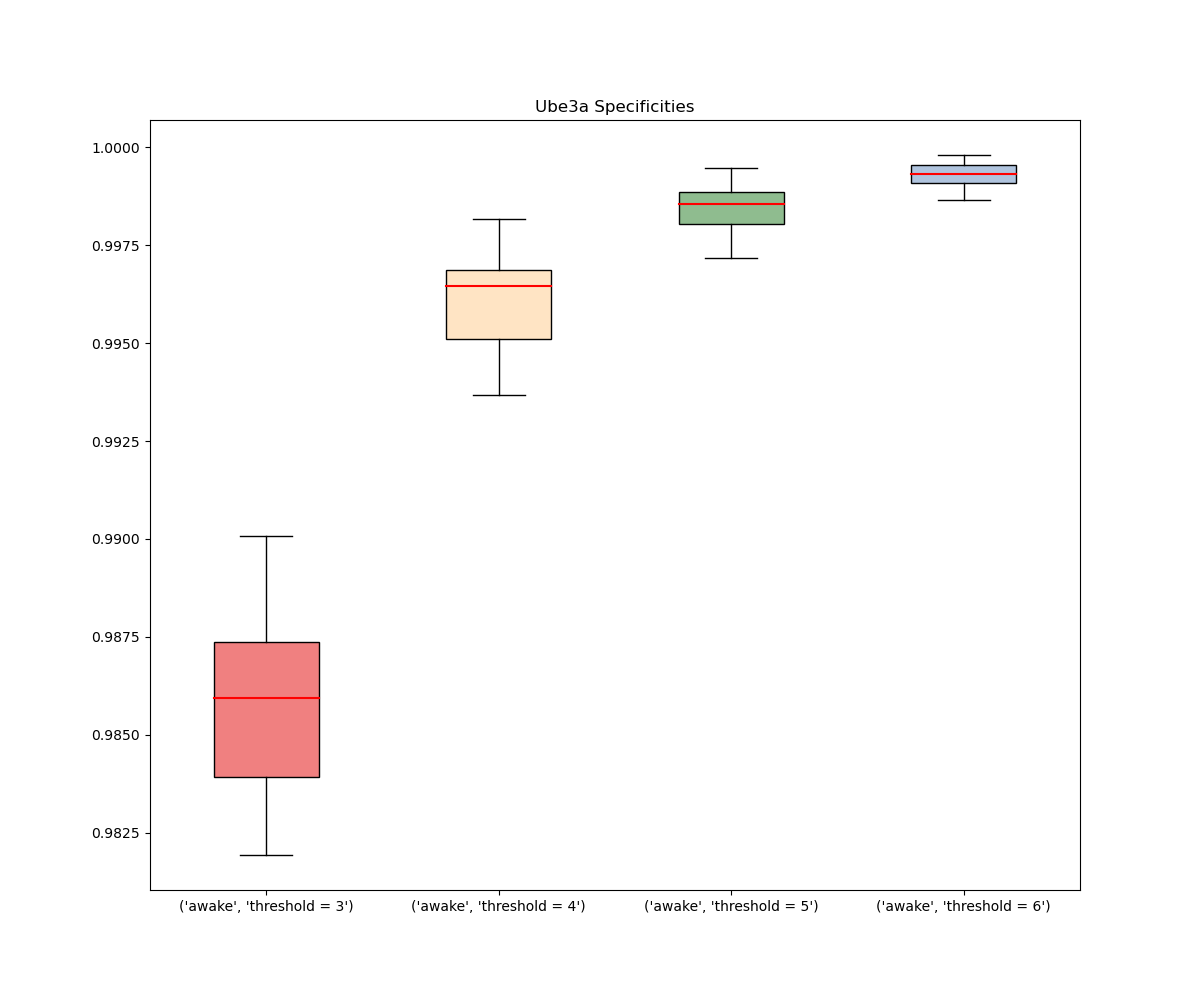

<div style="break-after:page"></div>

*Figure 22: $ Precision = \frac {TP} {TP + FP} $* 

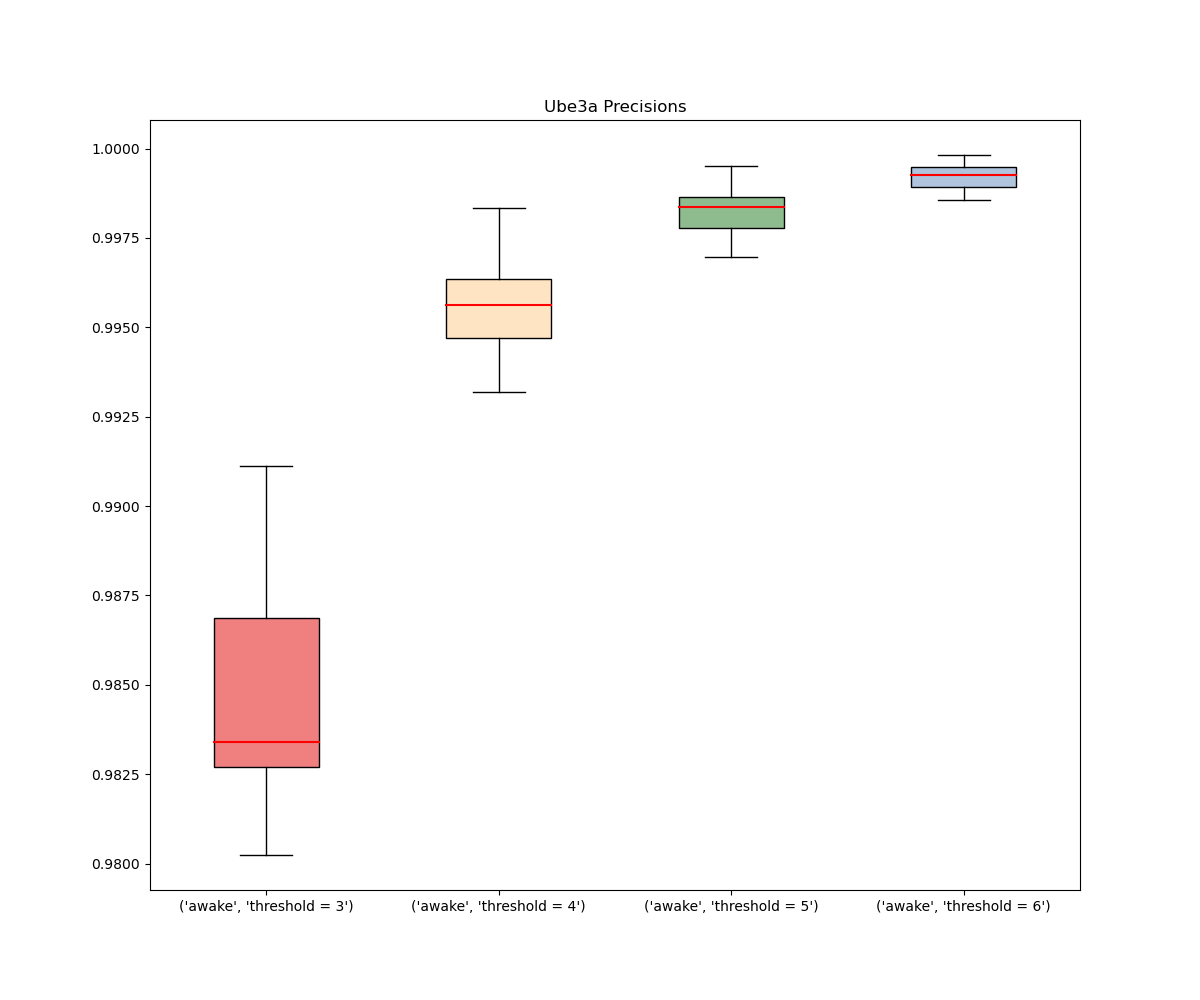

<div style="break-after:page"></div>

*Figure 23 Proportions within* 

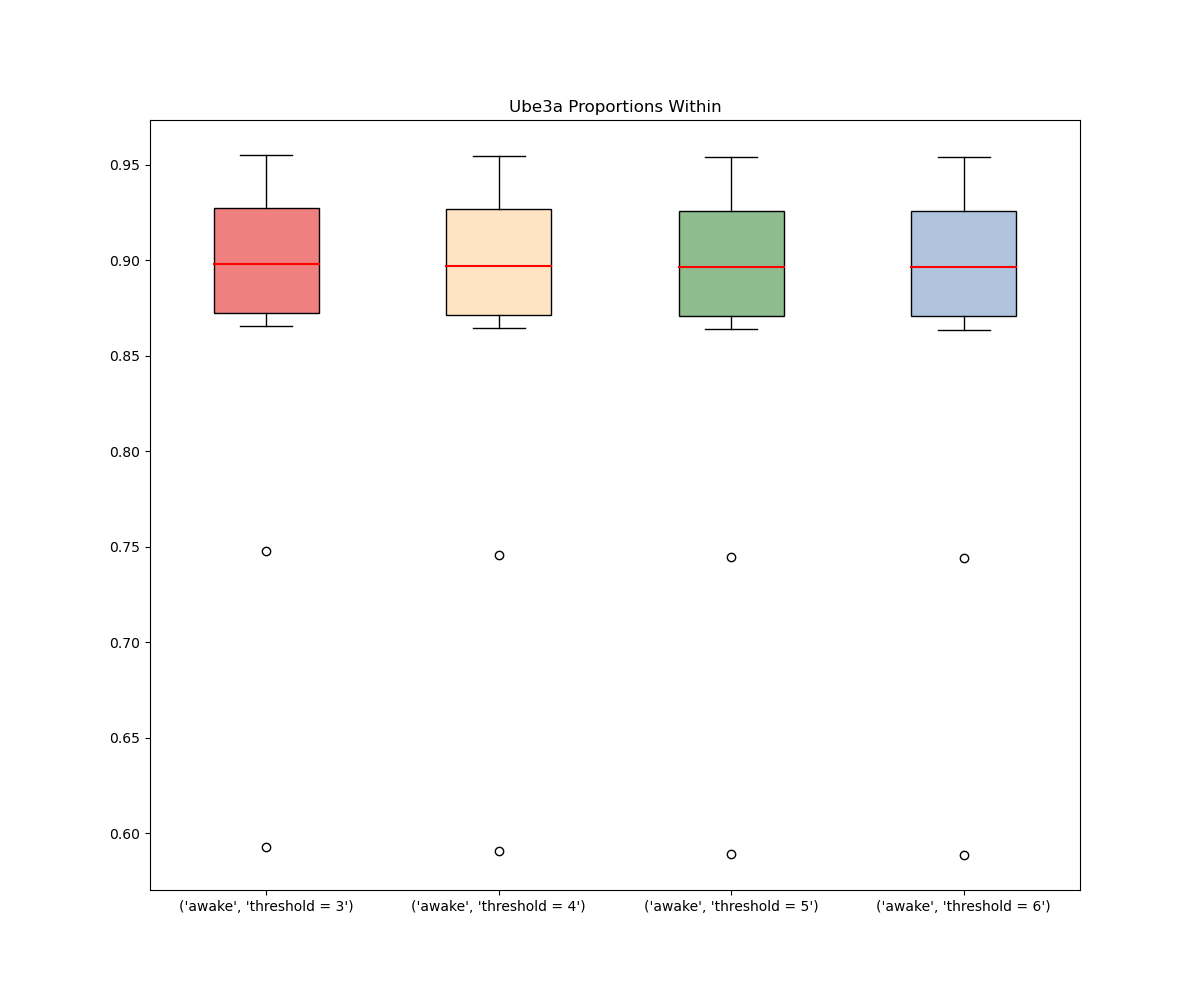

#### Conclusion
To summarize, thresholding is beneficial in the removal of artifacts from EEG signals. However, this is genotype-specific in that genotypes resulting in larger quantities of artifacts appear to benefit more. From our analysis, we found that artifact removal is not necessary for STXBP1 animals, though should be noted that a sample of 10 animals is quite small, and so even though our findings suggest that no thresholding is the most comparable to the annotated data, thresholding at standard deviation levels five and six is a safe option that would help manage STXBP1 animals with an outlying number of artifacts. The removal of artifacts is, however, crucial for Ube3a animals, in which case any of the given threshold levels produces a comparable PSD to the annotated, though the most effective ones appear to be at standard deviation four. 

---

## What I've Learned
During this project, I have not only honed my already-existing skills, but I've also learned a vast array of new skills that will undoubtedly contribute greatly to my future endeavors. 

Among these many enhanced and new skills are: 

#### General programming skills: 
- a greater understanding of data structures, most especially of dictionaries and Numpy arrays
- data visualization and creating statistical plots with the Matplotlib library
- a stronger grasp on numerical programming with the Numpy library, especially operating on arrays with complex shapes
- concurrent processing using multiprocessing modules as a means of significantly speeding up runtime
- writing effective documentation and type annotations for functions
- minimizing runtime by writing efficient code 
- determining the optimal way to store large amounts of data
- programming "pythonically" 
- modularizing code into functions for improved organization and reusability
- persistent storage of objects using the pickle module
- collaborating and sharing code via a git workflow (pushing, pulling, branching, merging)
- being conscious of memory usage while writing code
- using virtual environments to prevent conflicting dependencies
- how to deal with inconsistencies in data (varying recording durations and annotation labels)
- quantifying the quality of a model using the true positive, false positive, true negative, and false negative metrics

#### Testing: 
- linting using pylint to check stylistic and formatting conventions
- testing code execution using pytest
- building doctests within docstrings to exemplify function usage

#### Scientific insights: 
- using technology to address time-consuming manual tasks
- the purpose of the power spectral density in analyzing EEG signals
- sources of noise in EEG signals (sleep states, animal movement, etc.)

#### Application of digital processing modules in Openseize: 
- how and why to notch filter signals
- resampling signals
- thresholding signals by combining masks
- computing signal PSDs

Overall, this project has been an invaluable experience that has expanded my knowledge and expertise in programming and in real-world scientific projects. I am eager to apply these newfound skills in my future endeavors, and I am grateful for the opportunity to contribute to this project.

---

### Appendix
##### Interactive Plot Viewer

In [1]:
import os
import ipywidgets as widgets
from IPython.display import display, Image, clear_output

dirpath = "/home/jasmine/python/nri/threshold/report/psd plots"
filepaths = [os.path.join(dirpath, filename) for filename in os.listdir(dirpath)]

def create_image_gallery(filepaths):
    output_widgets = []
    
    for path in filepaths:
        out = widgets.Output()
        with out:
            display(Image(filename=path))
        output_widgets.append(out)
        
    gallery = widgets.HBox(output_widgets, layout=widgets.Layout(overflow_x='scroll', height='650px'))
    display(gallery)

create_image_gallery(filepaths)